# Model Selection 모듈

사이킷런의 model_selection 모듈은 
1. 학습 데이터와 테스트 데이터 세트를 분리
2. 교차 검증 분할 및 평가
3. Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공

## 1. 학습 데이터와 테스트 데이터 세트를 분리

In [75]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = load_iris()
dt_clf = DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)

## 2. 교차 검증 분할 및 평가

### 1.KFold Cross Validation
가장 보편적으로 사용되는 교차 검증 기법입니다. 

1. 폴드 세트 설정 
2. for 루프에서 반복으로 학습/테스트 데이터 인덱스 추출 
3. 반복적으로 학습과 예측 수행하고 예측 성능 반환

(하지만 불균형한 레이블 비율의 데이터에는 적합하지 않습니다.)

다음 붓꽃데이터의 레이블 비율은 1:1:1으로 균형(balanced)한 레이블 비율입니다.

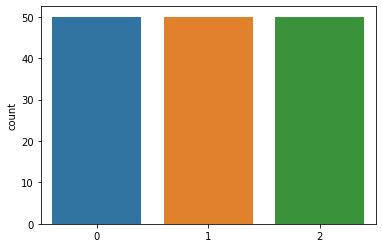

In [61]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns


iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=1)
sns.countplot(x=label);

In [62]:
# kfold

#5개의 폴드 세트로 분리하는 KFold 객체
kfold = KFold(n_splits=5)

#폴드 세트별 정확도를 담을 리스트 객체 생성
cv_accuracy = []
print("붓꽃 데이터 세트 크기 :", features.shape)

붓꽃 데이터 세트 크기 : (150, 4)


전체 붓꽃 데이터는 총 150개 입니다. 따라서 train data는 4/5인 120개 , test data(validation)는 1/5인 30개로 분할됩니다. 

In [63]:
n_iter = 0

# Kfold 객체의 split()를 호출(Kfold.split 인자로 lable은 입력안해도 무방.)
for train_index, test_index in kfold.split(features):

  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  
  # 반복 시마다 정확도 측정
  accuracy = accuracy_score(y_test, pred)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n{0}. 교차 검증 정확도 :{1}, 학습데이더 크기 {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('\n 검증 세트 인덱스:{0}'.format(test_index))
  cv_accuracy.append(accuracy)


1. 교차 검증 정확도 :1.0, 학습데이더 크기 120, 검증 데이터 크기: 30

 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2. 교차 검증 정확도 :1.0, 학습데이더 크기 120, 검증 데이터 크기: 30

 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3. 교차 검증 정확도 :0.9, 학습데이더 크기 120, 검증 데이터 크기: 30

 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4. 교차 검증 정확도 :0.9333333333333333, 학습데이더 크기 120, 검증 데이터 크기: 30

 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5. 교차 검증 정확도 :0.7333333333333333, 학습데이더 크기 120, 검증 데이터 크기: 30

 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]


In [41]:
# 개별 iteration별 정확도르 합하여 평균 정확도 계산
print('평균 검증 정확도 :', np.mean(cv_accuracy))

평균 검증 정확도 : 0.9133333333333333


### 1-2.K fold 의 문제점 확인

k fold(k=3)로 레이블을 학습/검증 데이터로 나눠 보겠습니다.

첫번째 교차검증에서 레이블 2와 1로만 학습하면 모델이 0 이라는 레이블은 절대 예측하지 못할 것 입니다. 두번째 세번째도 마찬가지 입니다.
세개 모두 정확도가 0으로 나와 평균을 내어도 전체 평균 검증 정확도 역시 0으로 나올 것 입니다.

만약 불균형한 레이블로 k fold 를 사용해 검증한다면 역시 좋은 검증 결과를 낼 수 없을 것 입니다.


In [50]:
import pandas as pd

# 아래 식이 이해가 안가면 깃허브 사이킷런 내장데이터 세트의 데이터 구성을 참고
# https://github.com/gggggeun/study/blob/main/1.%20%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0(Scikit_learn)/2.%20%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%20%EB%82%B4%EC%9E%A5%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%84%B8%ED%8A%B8.ipynb
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
print('레이블 종류와 개수 :\n ', iris_df['label'].value_counts())

레이블 종류와 개수 :
  2    50
1    50
0    50
Name: label, dtype: int64


In [67]:
kfold = KFold(n_splits=3)
n_iter=0

for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('\n\n## 교차 검증: {0}'.format(n_iter))
  print('\n학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('\n검증 레이블 데이터 분포:\n', label_test.value_counts())



## 교차 검증: 1

학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64

검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64


## 교차 검증: 2

학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64

검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64


## 교차 검증: 3

학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64

검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


### 2.Stratified K fold 
불균형(imbalanced)한 분포도를 가진 레이블 데이터 집합을 위한 K fold 방식입니다.

Stratified Kfold 는 Kfold가 레이블 데이터가 제대로 분배되지 못하는 경우의 문제를 해결해 줍니다. 원본 데이터의 레이블 분포를 먼저 고려한뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배하는 방식으로 말이죠.

Stratified Kfold를 사용하는 법은 위의 Kfold와 비슷합니다. 한가치 차이점은 Stratified Kfold는 레이블 분포에 따라 학습/검증 데이터를 나누기 때문에 plit() 메서드에 인자로 피처데이터 뿐만 아니라 레이블 데이터 세트도 반드시 필요하다는 사실입니다.

In [49]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('\n\n## 교차 검증: {0}'.format(n_iter))
  print('\n학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('\n검증 레이블 데이터 분포:\n', label_test.value_counts())



## 교차 검증: 1

학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64

검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64


## 교차 검증: 2

학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64

검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64


## 교차 검증: 3

학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64

검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


출력 결과를 보면 학습/검증 레이블 데이터의 값이 동일한 분포로 할당됐을을 알 수 있습니다.

정확도를 검증 해보겠습니다.

In [71]:
from sklearn.model_selection import StratifiedKFold

skford = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_index, test_index in skford.split(features, label):

  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  
  # 반복 시마다 정확도 측정
  accuracy = accuracy_score(y_test, pred)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n{0}. 교차 검증 정확도 :{1}, 학습데이더 크기 {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('\n 검증 세트 인덱스:{0}'.format(test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도르 합하여 평균 정확도 계산
print('\n\n\n평균 검증 정확도 :', np.mean(cv_accuracy))


1. 교차 검증 정확도 :0.98, 학습데이더 크기 100, 검증 데이터 크기: 50

 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

2. 교차 검증 정확도 :0.94, 학습데이더 크기 100, 검증 데이터 크기: 50

 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

3. 교차 검증 정확도 :1.0, 학습데이더 크기 100, 검증 데이터 크기: 50

 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]



평균 검증 정확도 : 0.9733333333333333


Stratified K fold 는 레이블 분포 특성을 반영하므로 왜곡된 레이블 데이터 세트에서는 반드시 이 교차검증을 사용해야합니다.

사실, 일반적으로 분류(Classification)에서의 교차검증은 Stratified K fold로 분할돼야 합니다. 회귀(Regression)에서는 Stratified K 폴드가 지원되지 않습니다. 이유는 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 레이블별로 분포를 정하는 의미가 없기 때문입니다.

다음으로 이러한 교차 검증을 보다 간편하게 제공해주는 사이킷런의 API를 살펴보겠습니다.

### 3. cross_val_score()

사이킷런은 교차 검증을 좀 더 편리하게 수행할 수 있게 해주는 API를 제공합니다. 

cross_val_score()는 kfold의 일련의 과정을 한꺼번에 수행해주는 API입니다.



cross_val_score**(estimator, X, y=None, scoring=None, cv=None**, n_job=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

- estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor
- X : Feature data set
- y : Label data set
- scoring : 예측 성능 평가 지표
- cv : 교차 검증 폴드 수

--- 

- classifier가 입력되면 Stratified Kfold로 분할
- Regressor가 입력되면 kfold로 분할


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=1)

features = iris_data.data
label = iris_data.target

# 성능 지표는 accracy, 교차 검증 세트는 3개
scores =cross_val_score(dt_clf, features, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도',scores)
print('평균 검증 정확도', np.round(np.mean(scores),4))

교차 검증별 정확도 [0.98 0.94 1.  ]
평균 검증 정확도 0.9733


cross_val_score() API는 내부에 Estimator를 학습(fit), 예측(predict), 평가(evaluation)시켜주므로 간단하게 교차검증을 수행할 수 있습니다.

앞의 StratifiedKFold와 cross_val_score()의 수행 결과가 동일함을 알 수 있습니다. 이는 cross_val_score()가 내부적으로 StratifiedKFold를 이용하기 때문입니다.

비슷한 예로 **cross_validate()**가 있습니다. 단 하나의 평가 지표만 가능한 cross_val_score()과 달리 여러 개의 평가 지표를 반환할 수 있습니다.

## 3. 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에하기(GridSearchCV)

하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측성능을 개선할 수 있습니다.

사이킷런은 GridSearchCV API를 이용해 분류나 회귀와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공합니다. (Grid는 격자라는 뜻으로, 촘촘하게 파라미터를 입력하면서 테스트를 하는 방식입니다.) 예를 들어 결정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾고자 한다면 다음과 같이 파라미터의 집합을 만들고 이를 순차적으로 적용하면서 최적화를 수행할 수 있습니다.

즉, 데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 피라미터 그리드에 기술된 모든 파라미터를 순차저긍로 적용해 최적의 파라미터를 찾을 수 있게 해줍니다. 

GridSearchCV는 사용자고 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트하면서 최적의 파라미터를 편리하게 찾게 해주지만 동시에 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸리는 것에 유념해야 합니다.

In [ ]:
# 결정 트리의 중요 하이퍼 파라미터 max_depth, min_samples_split
grid_parameters = {'max_depth': [1,2,3],
                   'min_samples_split': [2,3]}

---
예를 들면 위의 숫자가 순차적으로 적용되어 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하고 최적의 파라미터와 수행 결과를 도축할 수 있다. for 루프로 모든 파라미터를 번갈아 입력하면서 학습시키는 방법을 좀 더 유연하게 API 레벨에서 제공한 것입니다.

 6개의 파라미터 조합이라면 CV 3회 * 6개의 파라미터 조합 =18회의 학습/평가가 이루어 집니다.

---
GridSearchCV 주요 파라미터
- estimator : classifier, regressor, pipeline 사용가능
- param_grid : key + 리스트 값을 가지는 딕셔너리가 주어진다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정합니다.
- scoring : 평가 방법. 보통 문자열(ex.'accuracy')로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있습니다.
- cv : 교차검증을 위해 분할되는 학습/테스트 세트의 개수를 지정
- refit : defalt=True 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킵니다.


In [87]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data =load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=1)

dtree = DecisionTreeClassifier()

##파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth': [1,2,3], 'min_samples_split': [2,3]}

In [88]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 2개의 train, test set fold로 나누어 테스트 수행 설정.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000625,0.000193,0.000659,2.718300e-04,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.675,0.7,0.700,0.691667,0.011785,5
1,0.000433,0.000148,0.000388,1.949385e-04,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.675,0.7,0.700,0.691667,0.011785,5
2,0.000349,0.000018,0.000237,7.018853e-07,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.975,0.9,0.925,0.933333,0.031180,1
3,0.000935,0.000721,0.000357,4.737489e-05,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.975,0.9,0.925,0.933333,0.031180,1
4,0.000521,0.000018,0.000366,4.887419e-06,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,0.9,0.925,0.933333,0.031180,1
5,0.000518,0.000019,0.000361,4.158489e-06,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,0.9,0.925,0.933333,0.031180,1


GridSearchCV 속성

- .cv_results_
  - rank_test_score : 성능이 좋은 순위를 나타냄. 이때의 파라미터가 최적의 하이어 파라미터이다.(param)
  - mean_test_score : cv의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

- .best_params_

- .best_score

- .best_estimator

In [93]:
print('최적 파라미터 : ',grid_dtree.best_params_)
print('최고 정확도 :{0:.4f}'.format(grid_dtree.best_score_))

최적 파라미터 :  {'max_depth': 2, 'min_samples_split': 2}
최고 정확도 :0.9333


In [94]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_
estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
# GridSearchCV의 best_estimator_는 이미 최적학습이 됐으므로 별도의 학습이 필요 없음
pred = estimator.predict(X_test)
print('(최종)테스트 데이터 세트 정확도: ', accuracy_score(y_test, pred))

(최종)테스트 데이터 세트 정확도:  0.9666666666666667


일반적으로 학습데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법입니다.